# 1. Paquetes empleados

In [154]:
import pandas as pd
import numpy as np 
from scipy import stats as st 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
from matplotlib import style 
plt.style.use ("ggplot")
import warnings 
warnings.filterwarnings ("ignore")

# 2. Dataset

In [155]:
games = pd.read_csv (r"C:\Users\juand\OneDrive\Escritorio\TripleTen\Project 6\games.csv")
# Standardization of titles
new_title = []
for title in games.columns: 
    new_title.append (title.lower())
games.columns = new_title
games = games[~((games["platform"] == "DS") & (games["year_of_release"] < 2004))]

# 3. Basic Dataset Information

In [156]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  float64
 3   genre            16712 non-null  object 
 4   na_sales         16714 non-null  float64
 5   eu_sales         16714 non-null  float64
 6   jp_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


# 4. Treatment of null or undetermined values

Missing values ​​in the name column were removed, as the inability to identify their origin made it impossible to associate their sales with a representative object of interest. Consequently, records with null values ​​in that column were also removed. Similarly, since the game's name was unknown, its genre could not be determined; therefore, removing null values ​​from the name column also resulted in the removal of records with null values ​​in the genre column.

In [157]:
games = games.dropna (subset="name")

**Missing 'Critic Score' Values**

For missing values ​​in the "critic score" column, it was decided to leave them as null, since replacing them would not reflect the critics' true opinion of the game and would constitute an adjustment without valid justification.

**Missing 'Rating' Values**

For missing values ​​in the rating column, it was decided to replace them with "Unknown." This is because, according to the ESRB rating system, there is a "RP" (Rating Pending) category, used when a game has not yet received its official age rating. Since the column already contains values ​​with "RP," using this same value for the missing values ​​could mix truly null entries with those that do correspond to a pending rating.

**Missing Values ​​in 'user_score'**

Regarding null or undetermined values ​​in the "user_score" column, initially, the undetermined values, identified as "tbd", will be replaced with NaN, since, not yet defined, they can be considered null for the time being. In this case, it was decided to preserve these values ​​as null, as replacing them with the average user_score would not be representative of the actual game score. Therefore, the best option is to keep them as missing values.

In [158]:
games["user_score"] = games["user_score"].replace ("tbd", np.nan)

In [159]:
games ["rating"] = games ["rating"].replace (np.nan, "unknown")

Finally, regarding the game's release year, there is no external database available to definitively determine the publication date. Therefore, null values ​​will be retained as such.

# 5. Data type conversion

Regarding data type correction, the year column was changed from float to int, since years should not be displayed in decimal format. Similarly, the user_score column was changed from object to float, as preserving it as an object would prevent calculations and generate runtime errors.

In [160]:
games["year_of_release"] = games["year_of_release"].astype ("Int64")
games["user_score"] = games["user_score"].astype ("float")

# 6. Total sales

In [161]:
games["total_sales"] = games["na_sales"] + games["eu_sales"] + games["jp_sales"]

# 7. Data analysis

### Number of games per year

In [162]:
games_per_year = games.groupby (
    "year_of_release").agg (
    total_games = ("name", "count")).reset_index ()

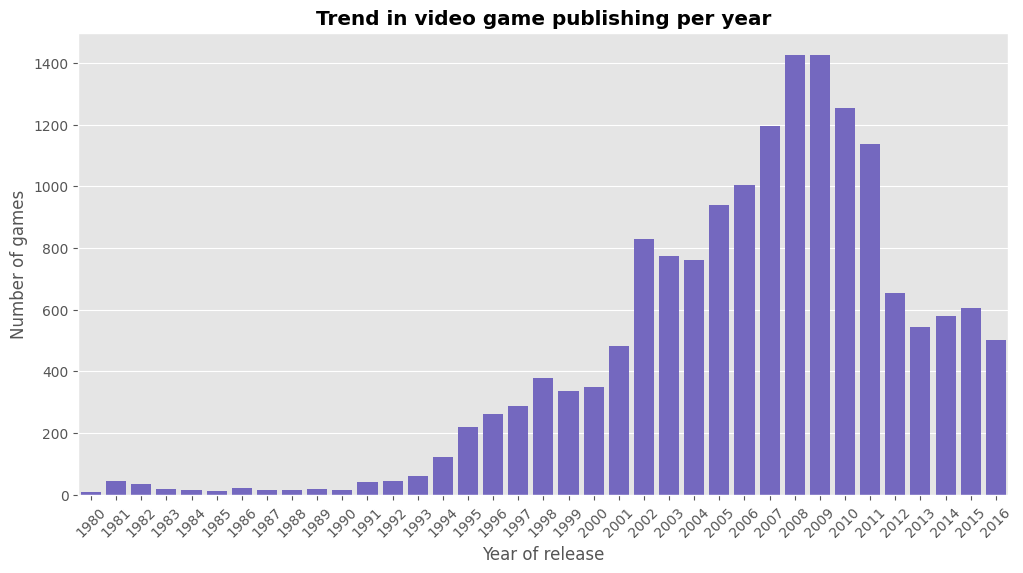

In [163]:
plt.figure (figsize=(12,6))
sns.barplot (
    data=games_per_year,
    x = "year_of_release", 
    y = "total_games",
    color = "slateblue"
)
plt.title ("Trend in video game publishing per year", fontdict={"weight":"bold"})
plt.xlabel ("Year of release")
plt.ylabel ("Number of games")
plt.xticks (rotation = 45)
plt.show()

### Highest Sales Volumes

In [164]:
most_sales = games.groupby ("platform").agg (
    total_sales = ("total_sales", "sum")).sort_values(
    by = "total_sales", ascending = False
    ).reset_index()
most_sales.head(10)

,platform,total_sales
0,PS2,1062.33
1,X360,885.66
2,Wii,828.44
3,PS3,803.97
4,DS,746.84
5,PS,689.95
6,GBA,310.12
7,PS4,265.79
8,PSP,252.63
9,XB,249.02


We can observe that the top-selling platforms are PS2, Xbox 360, Wii, PS3, DS, and PS. Starting with the PS console, a decrease in sales volume is noticeable, which could be due to two main factors: the platform is relatively new and has not yet reached its peak popularity, or it has not had a particularly successful commercial performance.

For this reason, the top-selling platforms will be selected to create a scatter plot of sales by platform over time, allowing for a more detailed analysis of their market behavior and lifecycle.

In [165]:
platform_name = []
sales_ps = 0
total_sales = 0
for platform, sales in zip(most_sales["platform"], most_sales["total_sales"]): 
    if sales > 600: 
        platform_name.append(platform)
    if platform in ["PS","PS2", "PS3"]: 
        sales_ps += sales
    total_sales += sales
    
print (platform_name)
print ()
print (f"Total sales of video games for PlayStation: {sales_ps}")
print ()
print (f"Total video game sales by platform: {total_sales}") 

['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS']

Total sales of video games for PlayStation: 2556.25

Total video game sales by platform: 8122.030000000001


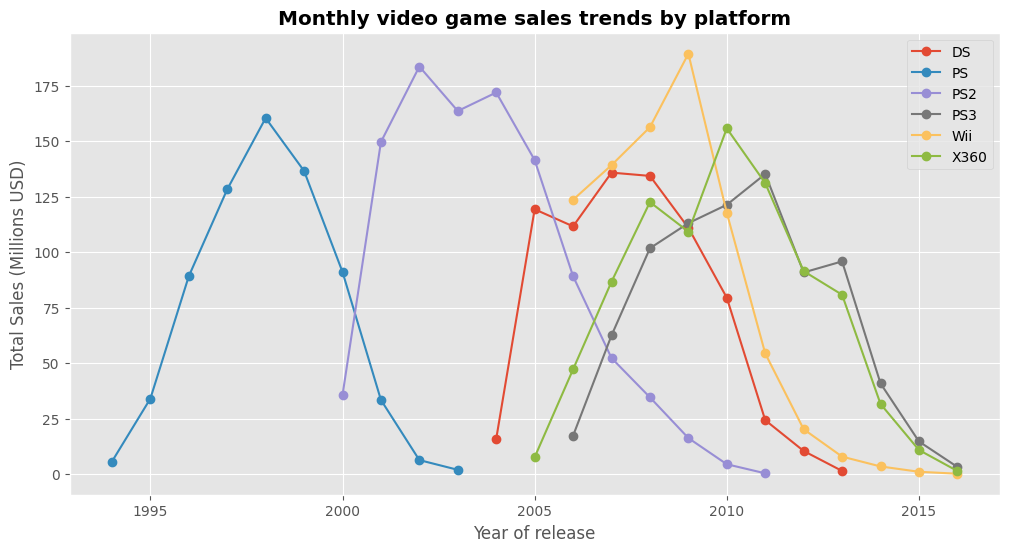

In [166]:
yearly_sales = games.query (
    "platform in @platform_name")

yearly_sales = yearly_sales.groupby (
    ["platform", "year_of_release"], as_index=False).agg(
    total_sales = ("total_sales", "sum")
    )

platform = yearly_sales["platform"].unique ()

plt.figure (figsize= (12,6))
for i, platform in enumerate (platform): 
    subset = yearly_sales [yearly_sales["platform"] == platform]
    plt.plot (subset["year_of_release"], subset["total_sales"], marker = "o", label = platform)

plt.legend()
plt.title ("Monthly video game sales trends by platform", fontdict={"weight":"bold"})
plt.xlabel ("Year of release")
plt.ylabel ("Total Sales (Millions USD)")
plt.show()

Regarding the annual video game sales trend by console, an outlier appears for the DS platform: there is a sales record in 1985 even though this console was officially launched in 2004. This produces an unexplained jump in the data and should be treated as an error in the dataset.

On the other hand, PlayStation's dominant role stands out, with its PS, PS2, and PS3 consoles together representing roughly 31% of sales for the selected platforms. The brand's strategy is clear: when one generation begins to show a decline in sales, a new platform is introduced, which reignites consumption and strengthens its position in the industry.

By contrast, although other brands such as Nintendo (Wii, DS) or Microsoft (Xbox 360) post high sales volumes in certain periods, there is no strategy as pronounced to maintain a continuous replacement cycle that ensures the same consistency in leadership of total sales compared with PlayStation.

### Plataformas Inactivas 

In [167]:
last_year = games["year_of_release"].max()
inactive_platforms = games.groupby("platform")["year_of_release"].agg("max")
inactive_platforms = inactive_platforms[inactive_platforms < last_year]
inactive_platforms

platform
2600    1989
3DO     1995
DC      2008
DS      2013
GB      2001
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2002
NES     1994
NG      1996
PCFX    1996
PS      2003
PS2     2011
PSP     2015
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
Name: year_of_release, dtype: Int64

If we compare the platforms with the highest sales to the list of inactive platforms, we can see that some were very popular in their time but currently no longer record sales, such as PS, PS2, DS, GBA, PSP, and Xbox. This is probably due to the emergence of new platforms that transformed the video game market and pushed consumers to migrate to them.

### Average Platform Lifespan

In [168]:
platform_lifespan = games.groupby ("platform")["year_of_release"].agg(["min", "max"])
platform_lifespan["duration"] = platform_lifespan["max"] - platform_lifespan["min"]
print (f"The average platform lifespan is {round (platform_lifespan["duration"].mean(), 3)} years")
print (f"Median = {platform_lifespan["duration"].median()}")
print (f"Mode = {platform_lifespan["duration"].mode()[0]}")

The average platform lifespan is 7.0 years
Median = 6.0
Mode = 9


### Relevant data for 2017 

The average platform duration is roughly 7.6 years (median = 6 years; mode = 11 years). This suggests that the typical console life cycle ranges between 6 and 8 years. Therefore, to model 2017 sales, the period 2010–2016 is chosen because it covers the final phase of seventh-generation consoles and the start of the eighth generation.

This is confirmed in the table, which shows that platforms like PS3 and Xbox 360 (seventh generation) were still active in 2016, alongside more recent platforms like PS4 and Xbox One (eighth generation). It is worth noting that PC is a special case, as it is a timeless platform where video games continue to be developed without a clear life-cycle limitation.

In addition, any platforms that are not active in 2016 will be discarded, since their sales are not relevant to the 2017 analysis. Although video game genres remain relatively stable, user needs and preferences evolve, so it is not appropriate to include data from platforms that have already stopped being productive in the market.

In [169]:
active_platforms = games.groupby ("platform", as_index=False)["year_of_release"].max()
active_platforms = active_platforms [active_platforms['year_of_release'] == last_year]
active_platforms = list(active_platforms["platform"])
active_platforms

['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

In [170]:
data = games.query ("year_of_release >= 2010 & platform in @active_platforms").reset_index()

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            4225 non-null   int64  
 1   name             4225 non-null   object 
 2   platform         4225 non-null   object 
 3   year_of_release  4225 non-null   Int64  
 4   genre            4225 non-null   object 
 5   na_sales         4225 non-null   float64
 6   eu_sales         4225 non-null   float64
 7   jp_sales         4225 non-null   float64
 8   other_sales      4225 non-null   float64
 9   critic_score     2178 non-null   float64
 10  user_score       2382 non-null   float64
 11  rating           4225 non-null   object 
 12  total_sales      4225 non-null   float64
dtypes: Int64(1), float64(7), int64(1), object(4)
memory usage: 433.4+ KB


### Sales Leaders

In [172]:
relevant_platforms = data.groupby (
    "platform", as_index=False)["total_sales"].agg (
    "sum").sort_values (
    by = "total_sales", ascending = False
    )
relevant_platforms

,platform,total_sales
7,X360,503.05
2,PS3,502.11
3,PS4,265.79
0,3DS,244.54
5,Wii,204.86
8,XOne,145.05
1,PC,107.89
6,WiiU,76.24
4,PSV,47.38


As we can see, the leading sales platforms are PlayStation consoles, with three consoles active in the market just before entering 2017: PS3, PS4, and PSV. Xbox also gains relevance due to the large amount of sales accumulated by its two active platforms, Xbox 360 and Xbox One. While other consoles also report considerable figures, compared with PlayStation and Xbox they are falling behind in market share.

### Trend for 2017

In [173]:
sales_per_year = data.groupby (
    ["platform", "year_of_release"], as_index=False)["total_sales"].agg(
    "sum"
    )

In [174]:
trend = sales_per_year.groupby ("platform").apply (
    lambda x: np.polyfit (x["year_of_release"], x["total_sales"], 1)[0]
)
trend = trend.reset_index (name = "slope")
print (trend.sort_values ("slope"))

  platform      slope
7     X360 -27.269286
2      PS3 -23.050714
5      Wii -17.003214
0      3DS  -8.565143
1       PC  -3.601071
6     WiiU  -2.900000
4      PSV  -0.606857
8     XOne   2.551000
3      PS4  12.689000


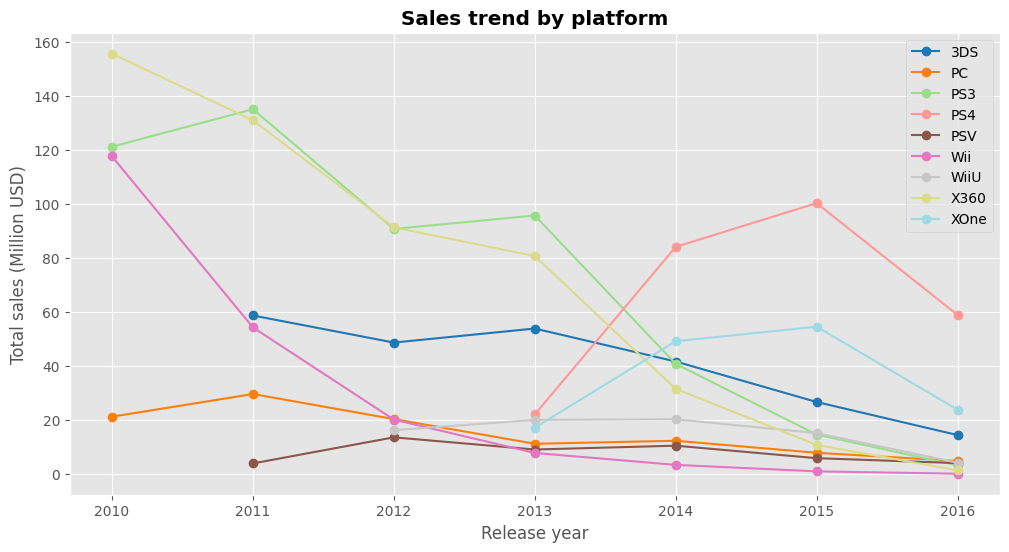

In [175]:
platforms = sales_per_year["platform"].unique ()

colors = cm.get_cmap("tab20", len(platforms))

plt.figure (figsize= (12, 6))

for i, platform in enumerate (platforms): 
    subset = sales_per_year[sales_per_year["platform"] == platform]

    plt.plot (subset["year_of_release"], subset["total_sales"], marker = "o", label = platform, color = colors(i))

plt.legend ()
plt.title ("Sales trend by platform", fontdict= {"weight":"bold"})
plt.xlabel ("Release year")
plt.ylabel ("Total sales (Million USD)")
plt.show ()

The chart shows that the only platforms with a **positive sales trend** are the eighth-generation consoles—**PS4 and Xbox One**—while the rest show a gradual decline. This suggests that, looking ahead, the platforms with the greatest profit potential will be those whose sales maintain sustained growth, such as PS4 and Xbox One.

It is also interesting to see innovative and portable platforms like **PSV and WiiU**, whose sales, while not very high, have not been affected as sharply. Finally, **PC** is a special case: it is a timeless platform that remains relevant thanks to the ability to upgrade hardware components, which allows it to adapt to new generations of video games without depending on a defined life cycle.

### Global Sales by Platform 

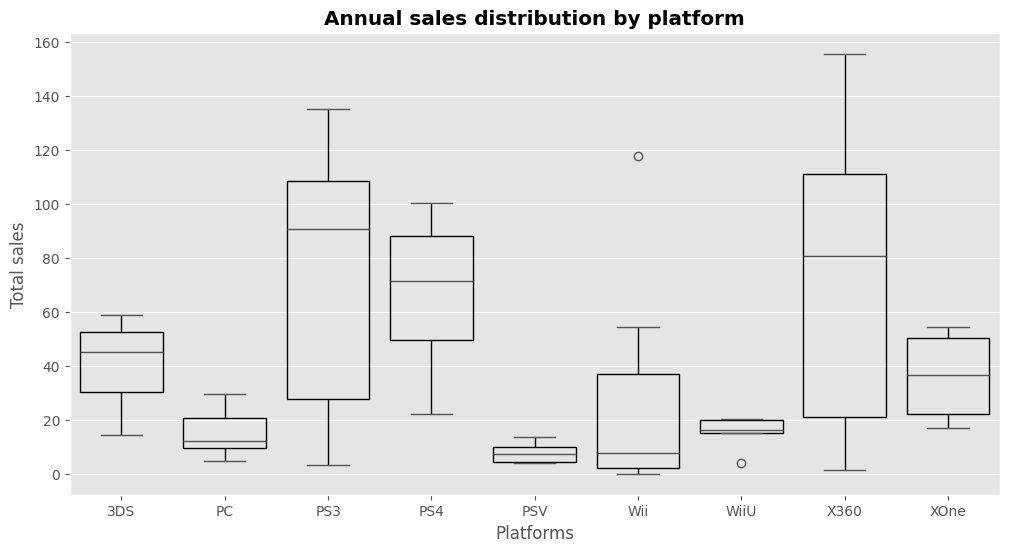

In [176]:
yearly_global = data.groupby (
    ["platform", "year_of_release"], as_index=False)["total_sales"].agg(
    "sum"
    )

plt.figure (figsize=(12,6))
sns.boxplot (
    data = yearly_global, 
    x = "platform", 
    y = "total_sales", 
    boxprops = dict (facecolor = "none", edgecolor = "black"), 
    whiskerprops = dict  (color = "black")
)
plt.title ("Annual sales distribution by platform", fontdict= {"weight":"bold"})
plt.xlabel ("Platforms")
plt.ylabel ("Total sales")
plt.show ()

We can see that, within the period and platforms analyzed, PS3 and Xbox 360 stand out with the highest medians and wide dispersion, reflecting many successful titles and several sales “hits.” However, when contrasted with the trend observed in previous charts, it is clear their sales show a negative slope, suggesting that in subsequent years these platforms will not represent a significant volume in the market.

For 3DS and Xbox One, both show moderate medians and acceptable performance, although without reaching the dominance of PS3 and Xbox 360. However, their trends also show a sharp decline in annual sales, which points to an unfavorable outlook for their future performance.

By contrast, lower-performing platforms like PC, PSV, and WiiU show low medians and a narrow interquartile range, indicating more consistent but limited sales. Even so, unlike the platforms mentioned above, their sales trend does not show such marked drops, which could represent relative stability and even a more encouraging outlook in the medium term.

A notable case is Wii, which, despite a low median, shows an extraordinary outlier associated with an iconic sales year thanks to an exceptionally successful title.

In short: although PS3 and Xbox 360 were the most successful platforms in global video game sales, their decline points to lower relevance in the future. In contrast, platforms that maintain stability in their sales, such as PS4, Xbox One, PSV, WiiU, and PC, appear more attractive because they offer a more sustainable long-term outlook.

### Influence of scores on sales 

In [177]:
ps4_sales = data.query ("platform == 'PS4'")

In [178]:
ps4_sales[["total_sales", "user_score", "critic_score"]].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.031261,0.405887
user_score,-0.031261,1.000000,0.557654
critic_score,0.405887,0.557654,1.000000


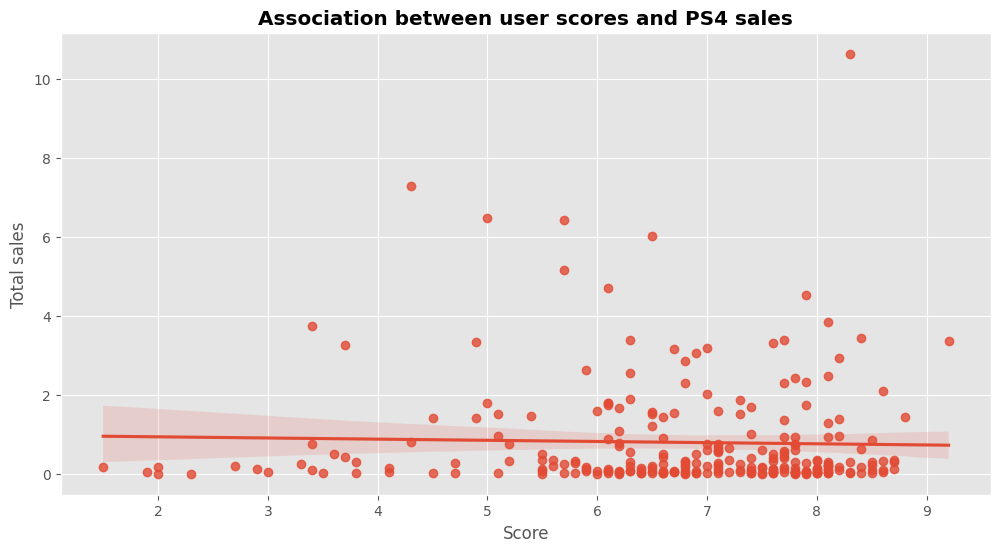

In [179]:
plt.figure (figsize=(12, 6))
sns.regplot (
    data = ps4_sales, 
    x = "user_score", 
    y = "total_sales"
)
plt.title ("Association between user scores and PS4 sales", fontdict={"weight": "bold"})
plt.xlabel ("Score")
plt.ylabel ("Total sales")
plt.show ()

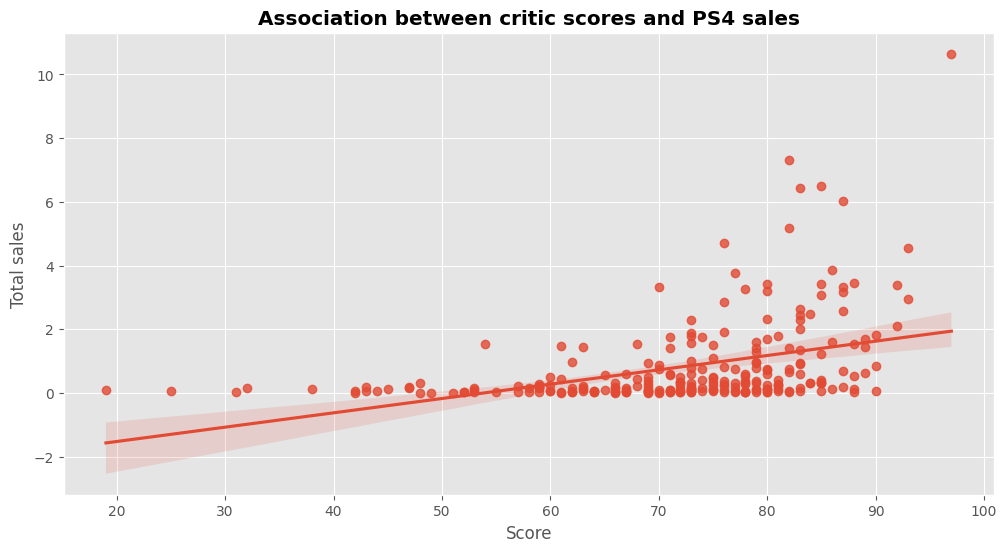

In [180]:
plt.figure (figsize=(12,6))
sns.regplot (
    data = ps4_sales, 
    x = "critic_score",
    y = "total_sales"
)
plt.title ("Association between critic scores and PS4 sales", fontdict= {"weight":"bold"})
plt.xlabel ("Score")
plt.ylabel ("Total sales")
plt.show ()

Looking at the correlation values, we conclude that the user score does not show a significant relationship with total PS4 video game sales, since its correlation value is -0.03, which indicates no linear association.

In contrast, the critic score shows a moderate and positive correlation with sales (value of 0.41). This suggests that, although it is not a determining factor, critic ratings can influence to some extent the commercial performance of PS4 titles.

In summary, neither score exerts a decisive influence on sales, although critic ratings seem to have a more relevant impact than those given by users.

### Influence of scores on sales for other platforms 

Given that the project makes a logical leap from analyzing the correlation between scores and total sales to comparing game sales by platform, the most coherent approach here is to extend the correlation analysis between scores and sales to other platforms, maintaining continuity with the previous section.

In [181]:
one_sales = data.query ("platform == 'XOne'")

In [182]:
one_sales [["total_sales", "user_score", "critic_score"]].corr()

,total_sales,user_score,critic_score
total_sales,1.000000,-0.068804,0.417206
user_score,-0.068804,1.000000,0.472462
critic_score,0.417206,0.472462,1.000000


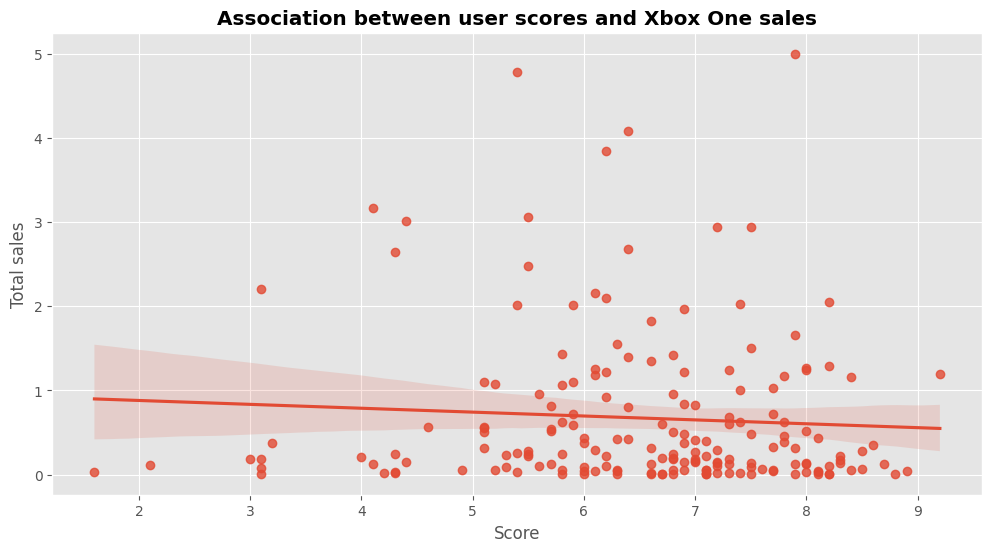

In [183]:
plt.figure (figsize= (12,6))
sns.regplot (
    data = one_sales, 
    x = "user_score", 
    y = "total_sales"
)

plt.title ("Association between user scores and Xbox One sales", fontdict={"weight": "bold"})
plt.xlabel ("Score")
plt.ylabel ("Total sales")
plt.show ()

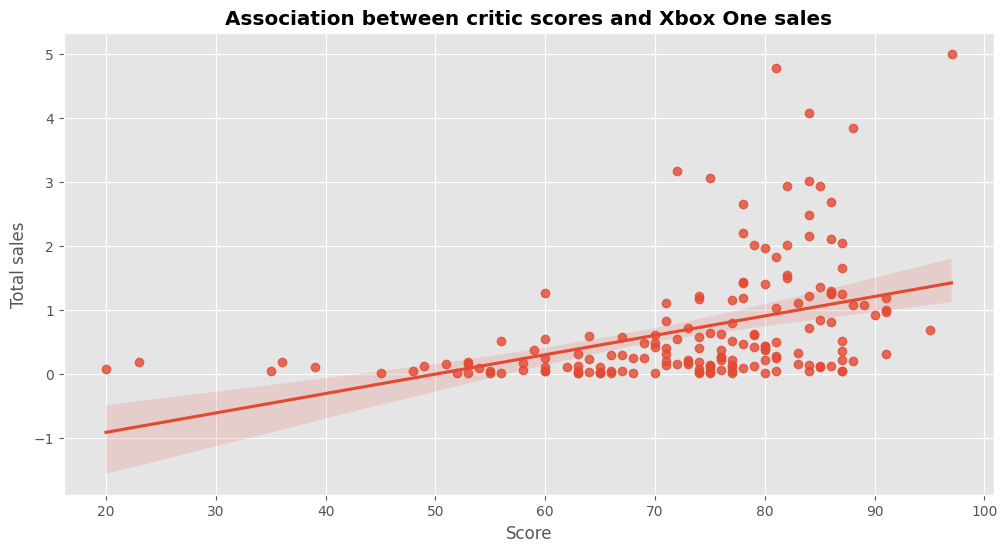

In [184]:
plt.figure (figsize= (12,6))
sns.regplot (
    data = one_sales, 
    x = "critic_score", 
    y = "total_sales"
)

plt.title ("Association between critic scores and Xbox One sales", fontdict={"weight": "bold"})
plt.xlabel ("Score")
plt.ylabel ("Total sales")
plt.show ()

On Xbox One, video game sales are not influenced by user scores, but they do show a moderate relationship with critic scores. As in PS4, this indicates that games rated more favorably by critics tend to sell more, although this relationship is not strong enough to be considered the only explanatory factor for sales.

### Most profitable video game genres 

In [185]:
genre = data.groupby (
    "genre", as_index= False).agg (
    number_of_games = ("name", "count"), total_sales = ("total_sales", "sum")).sort_values (
    by = "total_sales", ascending = False
    )
genre

,genre,number_of_games,total_sales
0,Action,1286,560.70
8,Shooter,398,420.88
10,Sports,497,276.32
7,Role-Playing,437,237.23
3,Misc,426,193.42
6,Racing,222,103.78
4,Platform,130,102.43
2,Fighting,169,68.50
9,Simulation,154,56.72
1,Adventure,324,41.87


In [186]:
sales_genre = data.groupby (
    ["genre", "year_of_release"], as_index = False)["total_sales"].agg("sum")

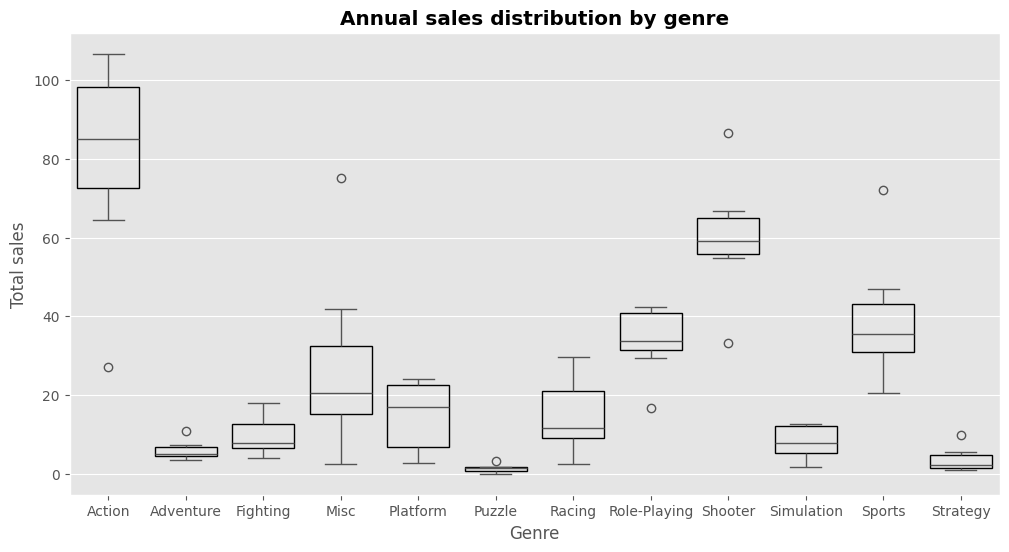

In [187]:
plt.figure (figsize= (12, 6))
sns.boxplot (
    data = sales_genre, 
    x = "genre", 
    y = "total_sales", 
    boxprops = dict (facecolor = "none", edgecolor = "black")
)

plt.title ("Annual sales distribution by genre", fontdict= {"weight":"bold"})
plt.xlabel ("Genre")
plt.ylabel ("Total sales")
plt.show ()

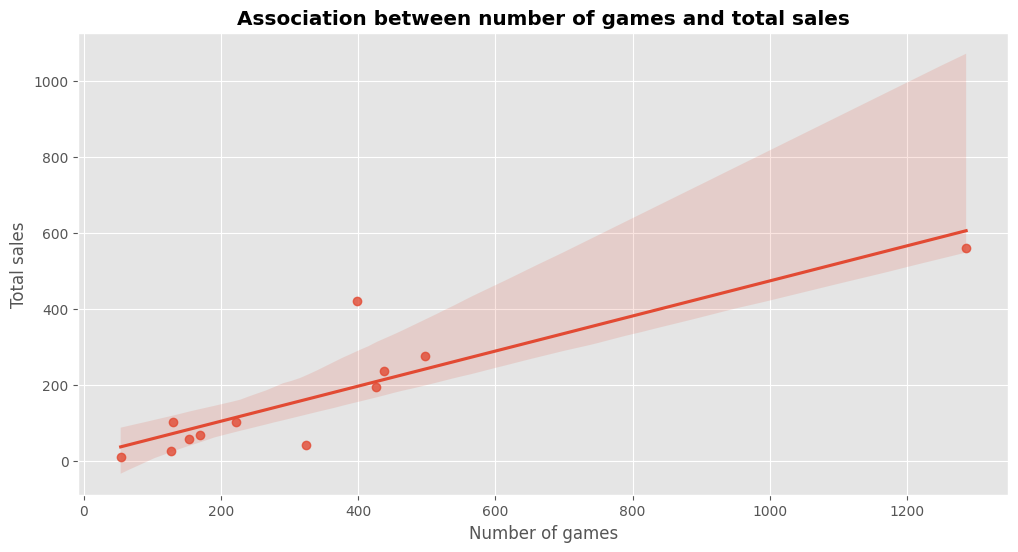

In [188]:
plt.figure (figsize=(12,6))
sns.regplot (
    data = genre, 
    x = "number_of_games", 
    y = "total_sales"
)
plt.title ("Association between number of games and total sales", fontdict= {"weight":"bold"})
plt.xlabel ("Number of games")
plt.ylabel ("Total sales")
plt.show ()

At first glance, genres appear to influence the level of sales, with Action, Shooter, Role-Playing, and Sports standing out in terms of total sales. However, a deeper look shows that these high figures are not necessarily due only to the intrinsic popularity of the genre but also to the number of games developed within each one.

The scatter plot reinforces this finding: there is a very strong and positive correlation between the number of games released and total sales. This indicates that, to a large extent, a genre's sales are determined by the supply of available titles rather than by the genre itself.

Furthermore, the boxplot by genre shows that genres such as Action and Shooter not only accumulate high total sales but also display specific years with extraordinarily high sales peaks (positive outliers). This suggests that in certain periods, titles were released that significantly boosted sales across the entire genre. In contrast, genres like Puzzle or Strategy exhibit low sales and a narrow range, without years marked by major hits that make a difference.

In conclusion, although genre partially influences sales, the real driver seems to be the number of games released and the presence of key years with outstanding releases that create peaks in each category's trajectory.

# 8. User profile by region

### Plataformas principales NA

In [189]:
na = data.groupby (["platform", "year_of_release"], as_index=False)["na_sales"].agg("sum")

In [190]:
na_sales = na.groupby ("platform", as_index=False)["na_sales"].agg("sum")
print (na_sales.sort_values("na_sales", ascending = False))

  platform  na_sales
7     X360    334.18
2      PS3    229.25
5      Wii    121.20
3      PS4    108.74
8     XOne     93.12
0      3DS     82.65
1       PC     39.07
6     WiiU     38.10
4      PSV     12.47


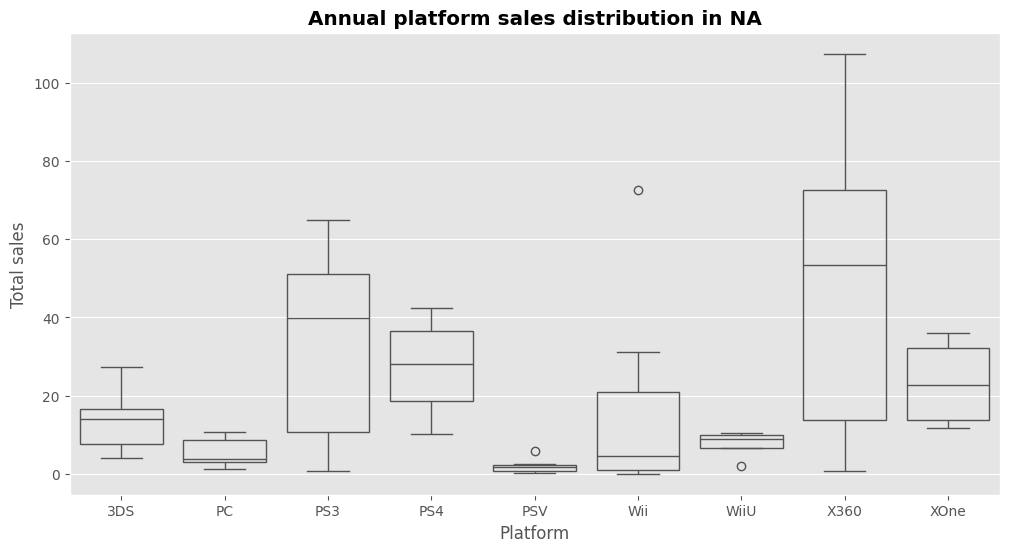

In [191]:
plt.figure (figsize= (12,6))
sns.boxplot (
    data = na, 
    x = "platform", 
    y = "na_sales",
    boxprops = dict (facecolor = "none")
)
plt.title ("Annual platform sales distribution in NA", fontdict= {"weight":"bold"})
plt.xlabel ("Platform")
plt.ylabel ("Total sales")
plt.show ()

In [192]:
trend_na = na.groupby ("platform").apply (
    lambda x: np.polyfit (x["year_of_release"], x["na_sales"], 1)[0]
)
trend_na = trend_na.reset_index (name = "slope")
print (trend_na.sort_values ("slope"))

  platform      slope
7     X360 -18.463929
2      PS3 -11.579643
5      Wii -10.300000
0      3DS  -4.344286
6     WiiU  -1.667000
1       PC  -1.599643
4      PSV  -0.682571
8     XOne   1.232000
3      PS4   4.170000


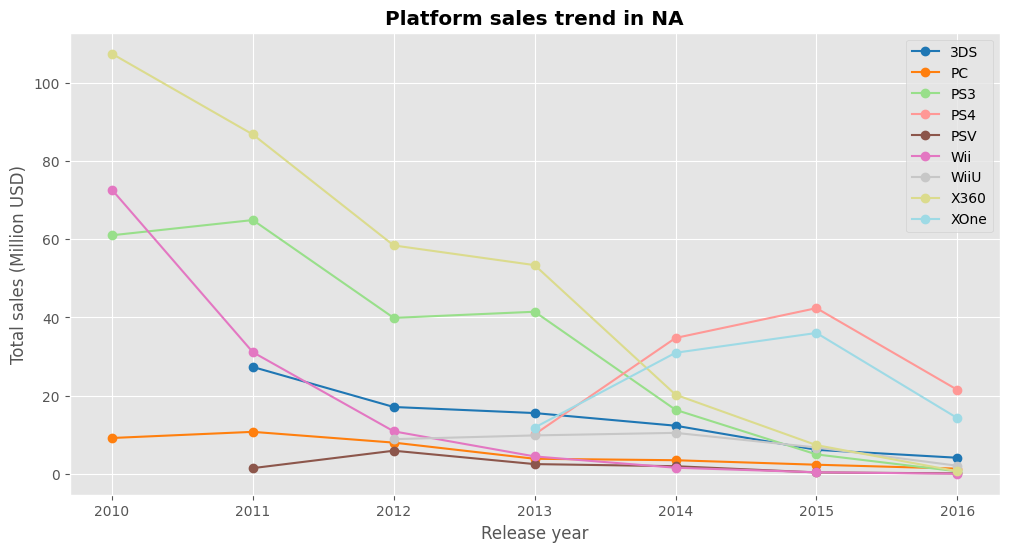

In [193]:
na_platform = na["platform"].unique ()

plt.figure (figsize= (12,6))
for i, platform in enumerate (na_platform): 
    subset = na[na["platform"] == platform]
    plt.plot (subset["year_of_release"], subset["na_sales"], marker = "o", label = platform, color = colors (i))

plt.legend ()
plt.title ("Platform sales trend in NA", fontdict= {"weight":"bold"})
plt.xlabel ("Release year")
plt.ylabel ("Total sales (Million USD)")
plt.show ()

### Plataformas principales EU

In [194]:
eu = data.groupby (["platform", "year_of_release"], as_index= False)["eu_sales"].agg("sum")

In [195]:
eu_sales = eu.groupby ("platform", as_index=False)["eu_sales"].agg("sum")
print (eu_sales.sort_values("eu_sales", ascending = False))

  platform  eu_sales
2      PS3    213.60
7     X360    163.41
3      PS4    141.09
1       PC     68.82
5      Wii     65.91
0      3DS     61.27
8     XOne     51.59
6     WiiU     25.13
4      PSV     13.07


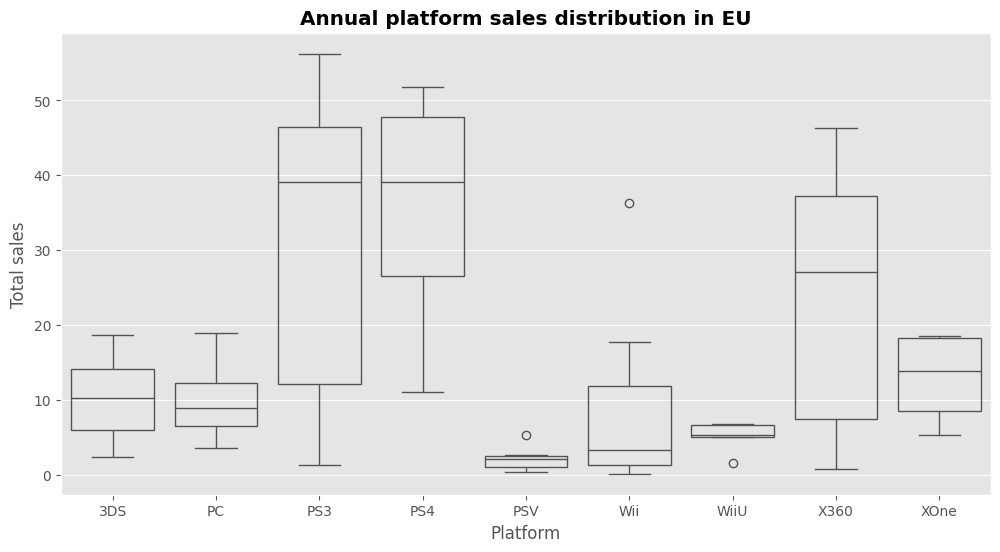

In [196]:
plt.figure (figsize = (12,6)) 
sns.boxplot (
    data = eu, 
    x = "platform", 
    y = "eu_sales", 
    boxprops = dict (facecolor = "none")
)
plt.title ("Annual platform sales distribution in EU", fontdict= {"weight":"bold"})
plt.xlabel ("Platform")
plt.ylabel ("Total sales")
plt.show ()

In [197]:
trend_eu = eu.groupby ("platform").apply (
    lambda x : np.polyfit (x["year_of_release"], x["eu_sales"], 1)[0]
)
trend_eu = trend_eu.reset_index (name = "slope")
print (trend_eu.sort_values ("slope"))

  platform     slope
2      PS3 -9.604643
7     X360 -8.417143
5      Wii -5.244643
0      3DS -3.070571
1       PC -2.001429
6     WiiU -0.929000
4      PSV -0.583714
8     XOne  1.319000
3      PS4  6.745000


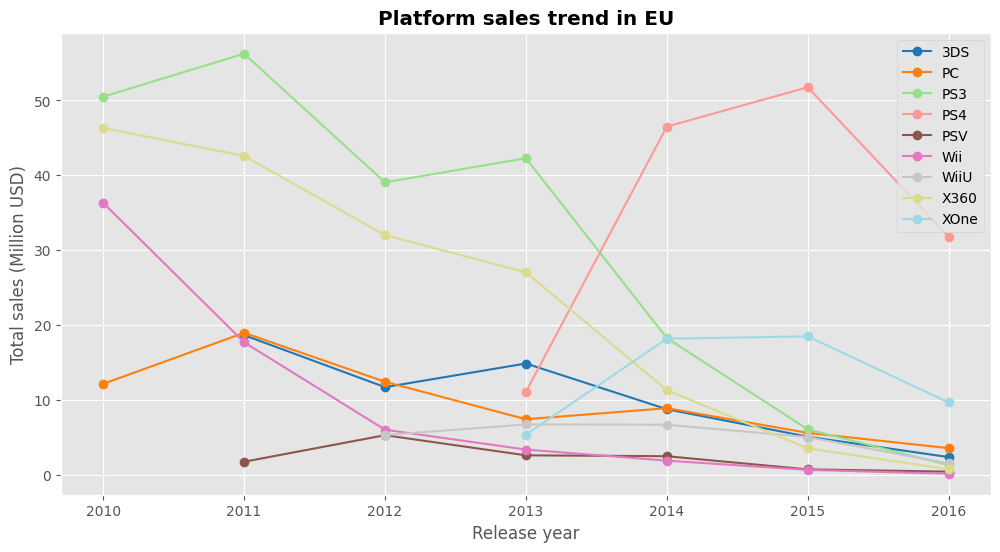

In [198]:
eu_platform = eu["platform"].unique ()

plt.figure (figsize = (12, 6))

for i, platform in enumerate (eu_platform): 
    subset = eu[eu["platform"] == platform]
    plt.plot (subset["year_of_release"], subset["eu_sales"], marker = "o", color = colors(i), label = platform)

plt.legend ()
plt.title ("Platform sales trend in EU", fontdict= {"weight":"bold"})
plt.xlabel ("Release year")
plt.ylabel ("Total sales (Million USD)")
plt.show ()

### Plataformas principales JP

In [199]:
jp = data.groupby (["platform", "year_of_release"], as_index = False)["jp_sales"].agg("sum")

In [200]:
jp_sales = jp.groupby ("platform", as_index=False)["jp_sales"].agg("sum")
print (jp_sales.sort_values ("jp_sales", ascending = False))

  platform  jp_sales
0      3DS    100.62
2      PS3     59.26
4      PSV     21.84
5      Wii     17.75
3      PS4     15.96
6     WiiU     13.01
7     X360      5.46
8     XOne      0.34
1       PC      0.00


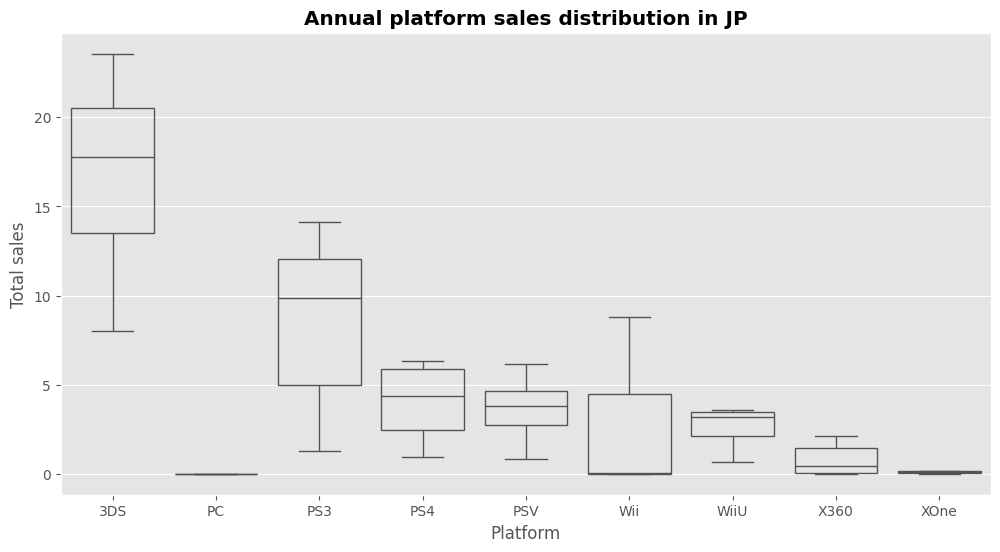

In [201]:
plt.figure (figsize= (12,6))
sns.boxplot (
    data = jp, 
    x = "platform", 
    y = "jp_sales", 
    boxprops = dict (facecolor = "none")
)
plt.title ("Annual platform sales distribution in JP", fontdict= {"weight":"bold"})
plt.xlabel ("Platform")
plt.ylabel ("Total sales")
plt.show ()

In [202]:
trend_jp = jp.groupby ("platform").apply (
    lambda x: np.polyfit (x["year_of_release"], x["jp_sales"], 1)[0]
)
trend_jp = trend_jp.reset_index (name = "slope")
print (trend_jp.sort_values ("slope"))

  platform         slope
2      PS3 -1.866429e+00
5      Wii -1.458571e+00
0      3DS -1.150286e+00
7     X360 -3.882143e-01
6     WiiU -3.040000e-01
1       PC  0.000000e+00
8     XOne  8.464719e-15
4      PSV  6.594286e-01
3      PS4  1.774000e+00


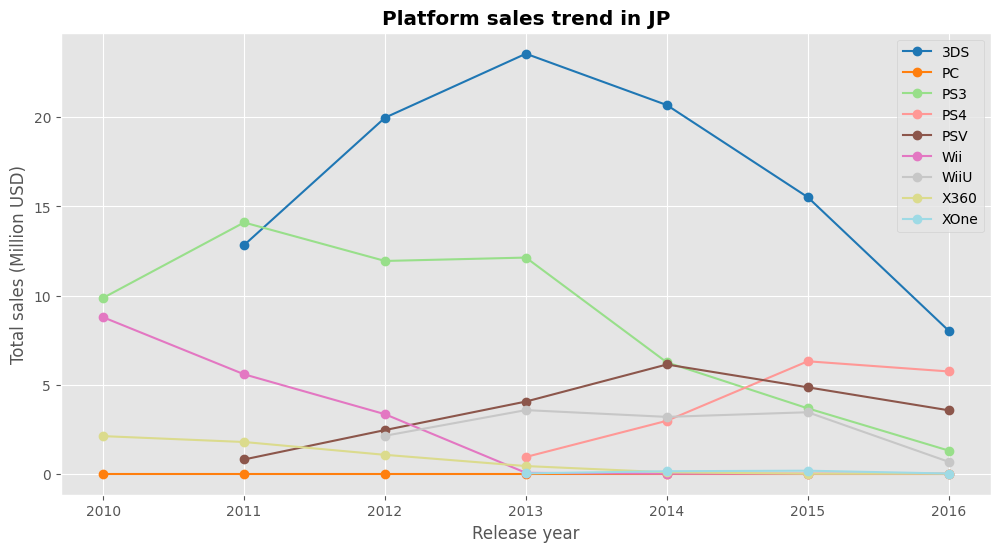

In [203]:
jp_platform = jp["platform"].unique ()

plt.figure (figsize=(12,6))

for i, platform in enumerate (jp_platform): 
    subset = jp[jp["platform"] == platform]
    plt.plot (subset["year_of_release"], subset["jp_sales"], marker = "o", color = colors(i), label = platform)

plt.legend()
plt.title ("Platform sales trend in JP", fontdict= {"weight":"bold"})
plt.xlabel ("Release year")
plt.ylabel ("Total sales (Million USD)")
plt.show ()

📍 **North America (NA)**

- **Leader in cumulative sales:** Xbox 360, followed by PS3, Wii, and to a lesser extent PS4 and Xbox One.

- **Annual distribution:** Xbox 360 shows greater sales dispersion and high outliers. PS3 and PS4 have a more concentrated and stable distribution.

- **Trend:** Seventh-generation platforms (X360, PS3, Wii) are in decline, with negative slopes. In contrast, PS4 and Xbox One show positive slopes, consolidating themselves as the platforms with the greatest projection for 2017.

- **Key insight:** The preference for Xbox is marked in this region (origin and positioning effect), but PS4 and Xbox One have growth potential because they are early in their life cycle.

📍 **Europe (EU)**

- **Leader in cumulative sales:** PS3, followed by Xbox 360 and PS4. PC appears much stronger than in NA.

- **Annual distribution:** PS3 and PS4 have wide ranges and high medians, indicating consistency in sales.

- **Trend:** As in NA, seventh-generation consoles are declining, while PS4 and Xbox One are growing (PS4 more strongly, with a clearly positive slope).

- **Key insight:** Europe is a market more open to PC gaming and maintains a strong PlayStation base. PS4 has the best projections.

📍 **Japan (JP)**

- **Leader in cumulative sales:** 3DS dominates by far, followed by PS3 and PSV.

- **Annual distribution:** 3DS shows the greatest concentration of sales around high values, while PS3 has a wide but declining distribution.

- **Trend:** Portable consoles carry more weight in Japan. The 3DS leads until 2015 but begins to decline; PS Vita remains moderately relevant. PS4 shows a positive slope, indicating an opportunity for growth. Xbox has virtually no presence.

- **Key insight:** Japan is a very different market, dominated by portable consoles and local brands (Nintendo, Sony). PS4 could grow as the natural replacement for PS3 and Wii, but without displacing handhelds in the short term.

🌍 **Global conclusion**

**NA:** Xbox 360 remains the most influential historically, but the future belongs to PS4 and Xbox One.

**EU:** PS3 led, but PS4 is consolidating as the new dominant platform. PC maintains an important role.

**JP:** Predominance of handhelds (3DS, PSV), with PS4 as the home console with the greatest projection.

👉 **Recommended sales strategy:**

**NA and EU:** focus on PS4 and Xbox One as emerging platforms, with campaigns that reinforce their adoption.

**JP:** prioritize handhelds (3DS, PSV) and strengthen PS4's presence as a home console option.

**Global:** unify efforts around PS4, as it is the only platform with a positive slope in all major regions, while the others show decline or stagnation. 

### Top genres NA

In [204]:
genre_na = data.groupby (
    "genre", as_index=False)["na_sales"].sum().sort_values (
    "na_sales", ascending=False).reset_index(drop = True)
genre_na.head()

,genre,na_sales
0,Action,274.66
1,Shooter,235.98
2,Sports,151.77
3,Misc,114.36
4,Role-Playing,98.14


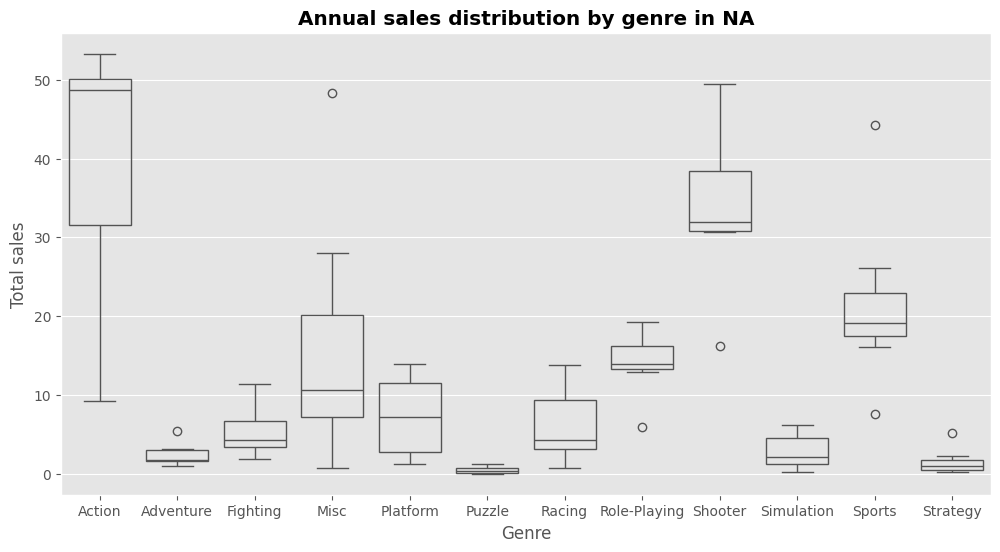

In [205]:
na_genre = data.groupby (
    ["genre", "year_of_release"], as_index=False)["na_sales"].sum()

plt.figure (figsize=(12,6))
sns.boxplot (
    data = na_genre, 
    x = "genre", 
    y = "na_sales", 
    boxprops = dict (facecolor = "none")
)

plt.title ("Annual sales distribution by genre in NA", fontdict= {"weight":"bold"})
plt.xlabel ("Genre")
plt.ylabel ("Total sales")
plt.show ()

### Top genres EU

In [206]:
genre_eu = data.groupby(
    "genre", as_index= False)["eu_sales"].sum().sort_values (
    "eu_sales", ascending = False).reset_index(drop = True)
genre_eu.head()

,genre,eu_sales
0,Action,224.26
1,Shooter,171.04
2,Sports,113.14
3,Role-Playing,69.02
4,Misc,60.79


<Axes: xlabel='genre', ylabel='eu_sales'>

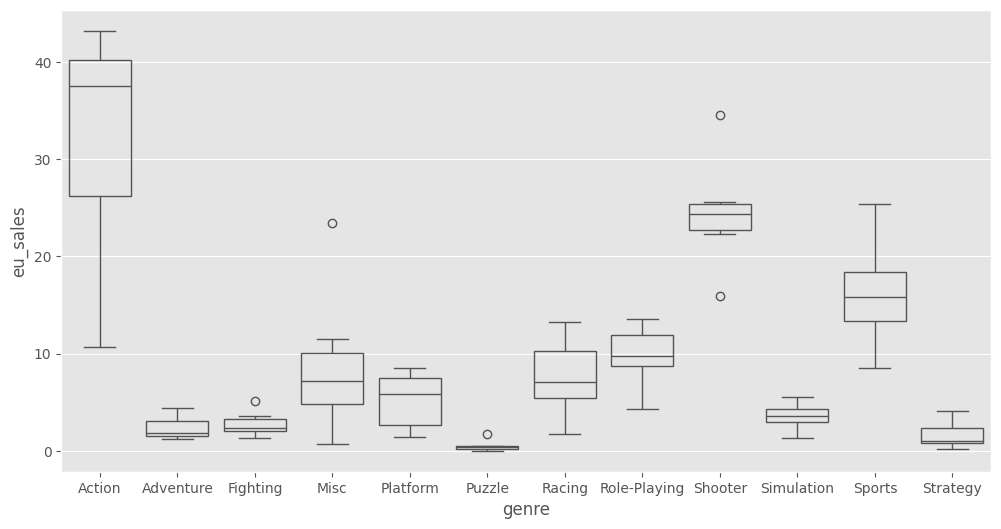

In [207]:
eu_genre = data.groupby (
    ["genre", "year_of_release"], as_index = False)["eu_sales"].sum()

plt.figure (figsize = (12,6))
sns.boxplot (
    data = eu_genre, 
    x = "genre", 
    y = "eu_sales",
    boxprops = dict (facecolor = "none")
)

### Top genres JP

In [208]:
genre_jp = data.groupby (
    "genre", as_index = False)["jp_sales"].sum().sort_values (
    "jp_sales", ascending = False).reset_index (drop = True)
genre_jp.head()

,genre,jp_sales
0,Role-Playing,70.07
1,Action,61.78
2,Misc,18.27
3,Platform,15.25
4,Shooter,13.86


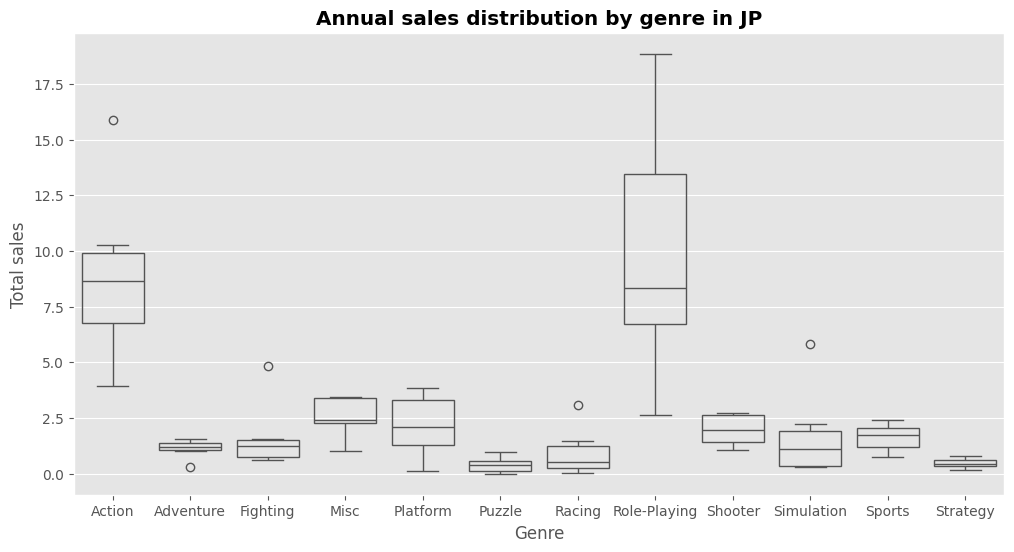

In [209]:
jp_genre = data.groupby (
    ["genre", "year_of_release"], as_index = False)["jp_sales"].sum()

def box (data, x, y, title, x_label, y_label): 
    plt.figure (figsize = (12,6))
    sns.boxplot (
        data = data, 
        x = x, 
        y = y, 
        boxprops = dict (facecolor = "none")
    )

    plt.title (title, fontdict = {"weight":"bold"})
    plt.xlabel (x_label)
    plt.ylabel (y_label)
    plt.show ()

box (jp_genre, "genre", "jp_sales", "Annual sales distribution by genre in JP", "Genre", "Total sales")

### Sales by rating in NA

In [210]:
class_na = data.groupby (
    "rating").agg (cantidad = ("name", "count"), na_sales = ("na_sales", "sum")).sort_values (
    "na_sales", ascending = False).reset_index()
class_na

,rating,cantidad,na_sales
0,M,708,380.94
1,E,726,241.65
2,T,789,154.95
3,E10+,515,146.09
4,unknown,1482,134.44
5,EC,4,0.71
6,RP,1,0.00


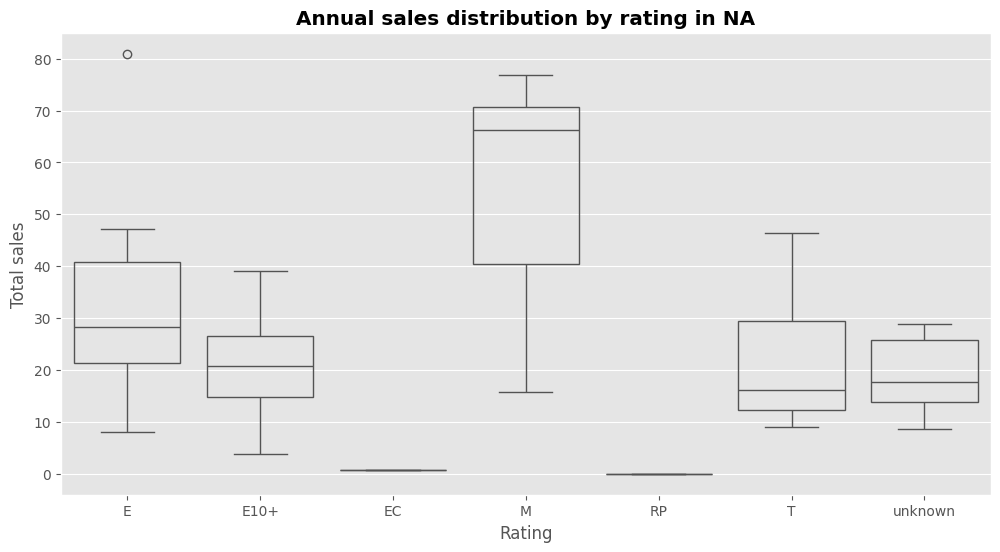

In [211]:
na_class = data.groupby (
    ["rating", "year_of_release"], as_index= False)["na_sales"].sum()
box (na_class, "rating", "na_sales", "Annual sales distribution by rating in NA", "Rating", "Total sales")

### Sales by rating in EU

In [212]:
class_eu = data.groupby (
    "rating").agg (cantidad = ("name", "count"), eu_sales = ("eu_sales", "sum")).sort_values (
    "eu_sales", ascending = False).reset_index ()
class_eu

,rating,cantidad,eu_sales
0,M,708,291.03
1,E,726,182.30
2,unknown,1482,126.93
3,T,789,110.61
4,E10+,515,92.99
5,RP,1,0.03
6,EC,4,0.00


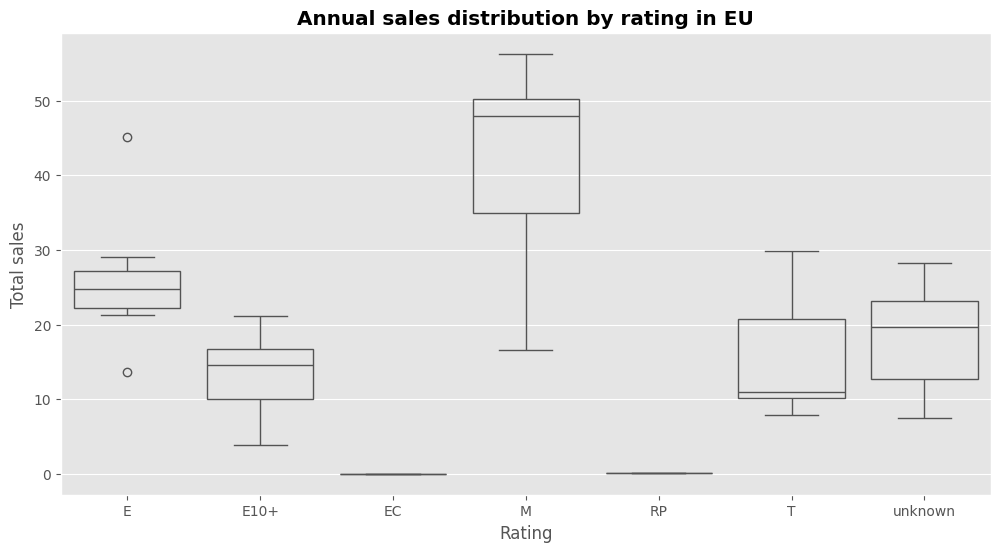

In [213]:
eu_class = data.groupby (
    ["rating", "year_of_release"], as_index= False)["eu_sales"].sum()
box (eu_class, "rating", "eu_sales", "Annual sales distribution by rating in EU", "Rating", "Total sales")

### Sales by rating in JP

In [214]:
class_jp = data.groupby (
    "rating").agg (cantidad = ("name", "count"), jp_sales = ("jp_sales", "sum")).sort_values (
    "jp_sales", ascending = False).reset_index ()
class_jp

,rating,cantidad,jp_sales
0,unknown,1482,114.76
1,E,726,42.38
2,T,789,36.09
3,M,708,29.79
4,E10+,515,11.22
5,EC,4,0.00
6,RP,1,0.00


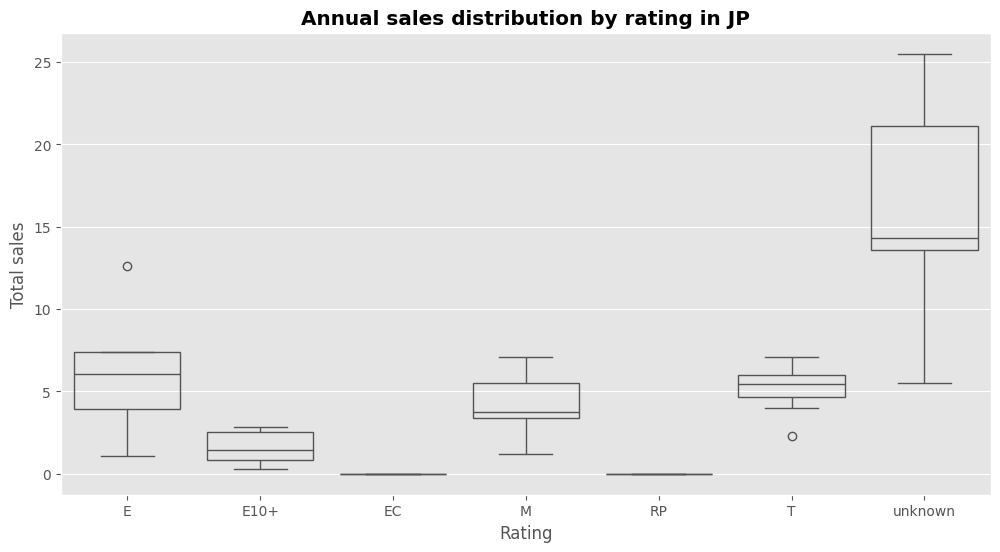

In [215]:
na_class = data.groupby (
    ["rating", "year_of_release"], as_index= False)["jp_sales"].sum()
box (na_class, "rating", "jp_sales", "Annual sales distribution by rating in JP", "Rating", "Total sales")

📍 **North America (NA)**

Games rated M (Mature) concentrate the highest total sales (≈381M), followed closely by E (Everyone) (≈242M).

The T (Teen) rating also contributes important sales (≈155M).

Games marked as unknown account for a very high number of titles (1482), but their sales volume (≈134M) is lower than the main categories, indicating that many of those games did not achieve strong commercial performance.

The boxplots show that M has the greatest dispersion, with titles reaching very high annual sales, confirming that in NA there is a clear preference for more mature-rated games.

**Conclusion NA:** Rating has an effect on sales: M, E, and T dominate the market, with M concentrating the highest sales peaks.

📍 **Europe (EU)**

Similar to NA, M leads in total sales (≈291M), followed by E (≈182M) and unknown (≈127M).

The T category plays a smaller role compared with NA (≈111M).

The boxplot confirms that M games are the best-selling, with wide dispersion and high outliers.

Conversely, categories such as E10+ or EC have almost no influence on the market.

**Conclusion EU:** The preference for Mature-rated games is even more marked, suggesting that the European audience primarily consumes titles aimed at adult players.

📍 **Japan (JP)**

Here the pattern is different: the category with the most sales is unknown (≈115M). This suggests that many titles sold in Japan do not carry an ESRB rating (possibly because they use Japan's CERO system).

Among ESRB ratings, the most notable is E (≈42M), followed by T (≈37M) and M (≈30M), but in volumes far lower than NA and EU.

The boxplot confirms that unknown dominates in dispersion and median sales.

**Conclusion JP:** The ESRB rating has little relevance in Japan. The weight of unknown shows that sales are dominated by titles without an ESRB rating, likely because the local market uses a different rating system.

**Overall conclusion**

Yes, ESRB classification affects sales in individual regions, but the impact varies:

NA and EU: strong influence, with Mature (M) as the clear leader.

JP: ESRB ratings have almost no influence, since games without a recorded rating (unknown) predominate, probably due to the difference in rating systems.

# 9. Hypothesis testing 

To select the statistical method for comparing user scores by platform and genre, data normality will be assessed through graphical analysis (histograms) and the Shapiro-Wilk test.

The Shapiro-Wilk test contrasts the following hypotheses:

- H0: The sample comes from a population with a normal distribution.

- H1: The sample does not come from a population with a normal distribution.

The results of this analysis will determine whether parametric or non-parametric tests are used in subsequent comparisons.

In [216]:
xbox_one = data.query ("platform == 'XOne'")
xbox_rating = xbox_one ["user_score"].dropna ()

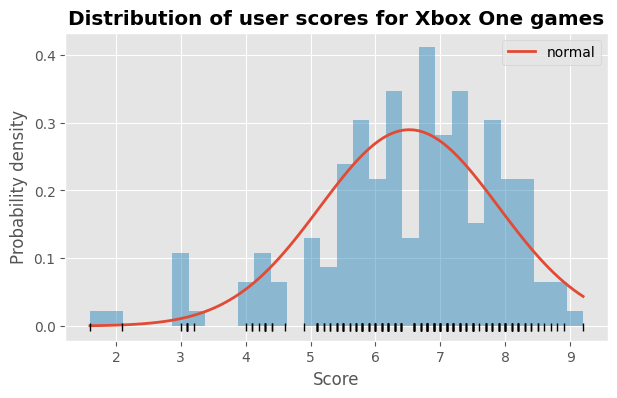

In [217]:
mu, sigma = st.norm.fit (xbox_rating)

x_hat = np.linspace (min(xbox_rating), max (xbox_rating), num=100)
y_hat = st.norm.pdf (x_hat, mu, sigma)

fig, ax = plt.subplots (figsize = (7,4))
plt.plot (x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist (x = xbox_rating, density=True, bins = 30, alpha = 0.5)
plt.plot (xbox_rating, np.full_like (xbox_rating, -0.001), "|k", markeredgewidth = 1)
plt.title ("Distribution of user scores for Xbox One games", fontdict={"weight": "bold"})
plt.xlabel ("Score") 
plt.ylabel ("Probability density")
plt.legend ();

In [218]:
stat, p_value =  st.shapiro (xbox_rating)
print (f"The null hypothesis of normal distribution is rejected with p_value ={round (p_value, 4)}")

The null hypothesis of normal distribution is rejected with p_value =0.0


In [219]:
pc = data.query ("platform == 'PC'")
pc_rating = pc["user_score"].dropna ()

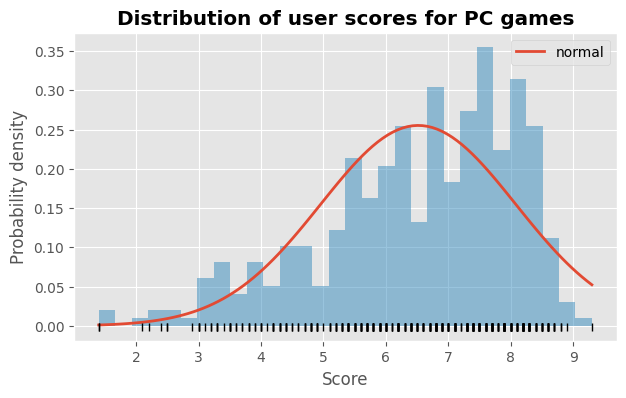

In [220]:
mu, sigma = st.norm.fit (pc_rating)

x_hat = np.linspace (min (pc_rating), max (pc_rating), num = 100)
y_hat = st.norm.pdf (x_hat, mu, sigma)

fig, ax = plt.subplots (figsize = (7,4))
plt.plot (x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist (x = pc_rating, density= True, bins = 30, alpha = 0.5)
plt.plot (pc_rating, np.full_like (pc_rating, -0.001), "|k", markeredgewidth = 1) 
plt.title ("Distribution of user scores for PC games", fontdict={"weight":"bold"})
plt.xlabel ("Score") 
plt.ylabel ("Probability density")
plt.legend ();

In [221]:
stat, p_value =  st.shapiro (pc_rating)
print (f"The null hypothesis of normal distribution is rejected with p_value ={round (p_value, 4)}")

The null hypothesis of normal distribution is rejected with p_value =0.0


Based on the normality analyses performed (Shapiro-Wilk test), the null hypothesis that PC and Xbox One game scores come from a normal distribution is rejected. For this reason, non-parametric statistics are used. Since two independent groups are being compared, the Mann–Whitney U test is applied, which is suitable for contrasting differences in score distributions between the two platforms.

Because we lack a prior directional hypothesis about data behavior, a two-tailed Mann–Whitney U test will be used. In this case, the hypotheses to be tested are:

- H0: The score distributions by platform are equal.

- H1: The score distributions by platform are different.

In [222]:
alpha = 0.01
stat, p_value = st.mannwhitneyu (xbox_rating, pc_rating)

if p_value < alpha: 
    print (f"We reject the null hypothesis with p_value = {round (p_value, 4)}")
else: 
    print (f"We accept the null hypothesis with p_value = {round (p_value, 4)}")

We accept the null hypothesis with p_value = 0.5563


The two-tailed Mann–Whitney U hypothesis test indicates that the null hypothesis cannot be rejected, as no statistically significant evidence of differences in scores between the two platforms was found. This suggests that user score behavior remains similar on both platforms.

In [223]:
# Action and sports 

action = data.query ("genre == 'Action'")
action_rating = action ["user_score"].dropna()

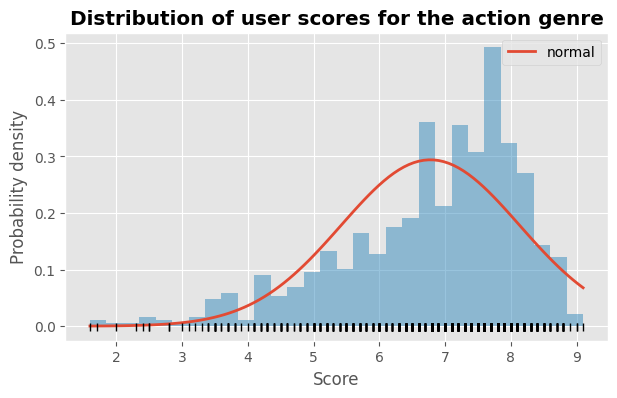

In [224]:
mu, sigma = st.norm.fit (action_rating)
x_hat = np.linspace (min(action_rating), max (action_rating), num = 100)
y_hat = st.norm.pdf (x_hat, mu, sigma) 

fig, ax = plt.subplots (figsize = (7,4))
plt.plot (x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist (x = action_rating, density= True, bins = 30, alpha= 0.5)
plt.plot (action_rating, np.full_like (action_rating, -0.001), "|k", markeredgewidth = 1)
plt.title ("Distribution of user scores for the action genre", fontdict={"weight":"bold"})
plt.xlabel ("Score") 
plt.ylabel ("Probability density")
plt.legend ();

In [225]:
stat, p_value =  st.shapiro (action_rating)
print (f"The null hypothesis of normal distribution is rejected with p_value ={round (p_value, 4)}")

The null hypothesis of normal distribution is rejected with p_value =0.0


In [226]:
sports = data.query ("genre == 'Sports'")
sports_rating = sports["user_score"].dropna()

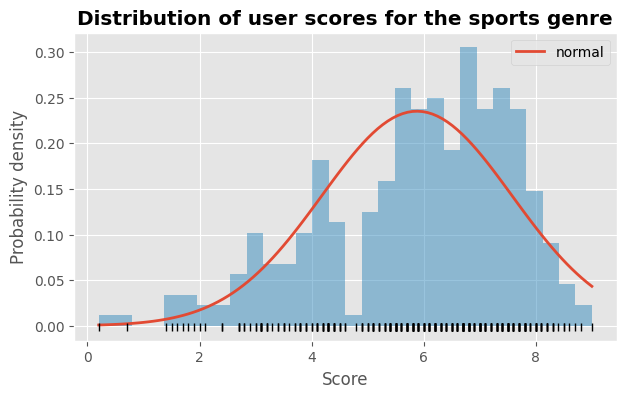

In [227]:
mu, sigma = st.norm.fit (sports_rating)
x_hat = np.linspace (min (sports_rating), max (sports_rating), num = 100)
y_hat = st.norm.pdf (x_hat, mu, sigma) 

fig, ax = plt.subplots (figsize = (7,4))
plt.plot (x_hat, y_hat, linewidth = 2, label = "normal")
plt.hist (x = sports_rating, density= True, bins = 30, alpha = 0.5)
plt.plot (sports_rating, np.full_like (sports_rating, -0.001), "|k", markeredgewidth = 1)
plt.title ("Distribution of user scores for the sports genre", fontdict={"weight":"bold"})
plt.xlabel ("Score") 
plt.ylabel ("Probability density")
plt.legend ();

In [228]:
stat, p_value =  st.shapiro (sports_rating)
print (f"The null hypothesis of normal distribution is rejected with p_value ={round (p_value, 4)}")

The null hypothesis of normal distribution is rejected with p_value =0.0


Based on the normality analyses performed using the Shapiro-Wilk test, the null hypothesis that action and sports game scores follow a normal distribution is rejected. For this reason, non-parametric statistics are used. Since two independent groups are being compared, the Mann–Whitney U test is applied, which is suitable for contrasting differences in score distributions between the two genres.

Because we do not have a prior directional hypothesis about data behavior, a two-tailed Mann–Whitney U test will be used. In this case, the hypotheses to be tested are:

- H0: The score distributions by genre are equal.

- H1: The score distributions by genre are different.

In [229]:
alpha = 0.01
stat, p_value = st.mannwhitneyu (action_rating, sports_rating)

if p_value < alpha: 
    print (f"We reject the null hypothesis with p_value = {round (p_value, 4)}")
else: 
    print (f"We accept the null hypothesis with p_value = {round (p_value, 4)}")

We reject the null hypothesis with p_value = 0.0


Since the p-value = 0.0 < alpha = 0.01, the null hypothesis is rejected, and it is concluded that individual scores by genre are significantly different.

# Overall Conclusion

The analysis of video game sales and reviews made it possible to identify the main factors associated with commercial success and to outline marketing strategies for 2017.

First, it was confirmed that the average platform life cycle ranges between 6 and 8 years, which justified using 2010–2016 as the study window. This made it possible to detect which consoles remained relevant at the end of 2016 and which showed an irreversible decline. In this regard, PlayStation 4 and Xbox One emerge as the platforms with the greatest growth potential, while seventh-generation consoles (PS3, Xbox 360, Wii) have already entered a decline phase. PC is a particular case, remaining a timeless platform thanks to constant hardware upgrades.

In terms of genres, Action, Shooter, and Sports concentrate most sales, although their success is strongly linked to the volume of titles released rather than an inherent advantage of the genre. Sales spikes associated with standout titles were also observed, generating positive outliers within each category.

The regional analysis revealed notable differences:  
- **North America:** marked preference for Xbox 360 historically, with a transition toward PS4 and Xbox One.  
- **Europe:** dominance of PlayStation and a more relevant role for PC.  
- **Japan:** leadership of handheld consoles (3DS, PSV), with growth opportunities for PS4.  

Regarding the influence of reviews, the results indicate that user scores have little relation to sales, while critic ratings show a moderate, positive correlation. This suggests they can support a title's success but are not decisive.

Finally, the hypothesis tests confirmed no significant differences in user ratings between PC and Xbox One, while statistically significant differences were observed between Action and Sports genres, indicating that players tend to rate these game types differently.

Taken together, the study suggests that the most promising strategy for 2017 is to:  
- **NA and EU:** reinforce campaigns around PS4 and Xbox One.  
- **JP:** prioritize handhelds and consolidate PS4 as a home console.  
- **Global:** focus efforts on PlayStation 4 as the only platform with a positive trend across all regions.  

This made it possible to identify clear patterns of market success, build differentiated regional profiles, and back the company's strategic decisions with statistical evidence.